# Christhoper Julio Hariyanto - 2602087390 - Mid Term - Text Mining

### Project Description:

### The goal of this project is to learn about how Indonesian Citizens' opinion on machine learning in Indonesia. It is quite a challenge to find videos specifically about Machine Learning since it is not a common topic in Indonesia. Most of the videos available are tutorial/educational videos so it can't quite capture people's opinion on Machine Learning. To make it fair, I used some Machine Learning Tutorial video and some Artificial Intelligence video since both topic are quite similar.

### Here are some of the video titles I used in the dataset:
### 1. AI Sama Sekali Enggak Seperti yang Kalian Kira
![Description](https://drive.google.com/uc?export=view&id=1f-kcs1i9bK-5bo7AZQCbZJzZD6BUHzYp)


### 2. MULAI BELAJAR MACHINE LEARNING | Artificial Intelligence (AI) | Data Science dari TIGA HAL INI
![Description](https://drive.google.com/uc?export=view&id=1WdvyS5LyUeyEYTsRY_lu1DHpr4xxL9UI)


### 3. 01 - Berkenalan dengan Machine Learning
![Description](https://drive.google.com/uc?export=view&id=1-QESSRk5uOCnBQ8za05R6j_7ZT__Nnl-)


### 4. Pengalaman Belajar Machine Learning Sebagai Orang Awam | Beginner
![Description](https://drive.google.com/uc?export=view&id=1ndnI_zvt3Jts4yRco4IAK2csbfTFso1I)


### 5. Pengalaman setelah 3 bulan jadi AI Engineer -- Dino Bercerita
![Description](https://drive.google.com/uc?export=view&id=1KjIBKOLmTx5dYW9R1t0U6x6EQvJEKdIc)


### 6. Deploy Model Machine Learning dalam 1 Jam! Dari Pemodelan sampai Live untuk Pemula
![Description](https://drive.google.com/uc?export=view&id=1WZfeLirqNR9HZ6xjI4_UKzGayk9kmsWU)


### 7. Mengenal Artificial Intelligence (Kecerdasan Buatan) - Kuliah AI 01
![Description](https://drive.google.com/uc?export=view&id=186ZzFwStN-ibZDMRAsWHlCL_7mxSRcHB)

### Import Packages

In [24]:
import os
from googleapiclient.discovery import build
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns

### Creating function to scrape comments from youtube using Youtube API from Google Cloud Console

In [9]:
# API Key from Google Cloud Console
API_KEY = 'API Key' # API Key is currently restricted and will be deleted once the Mid Term is scored

# Function to scrape comments
def get_youtube_comments(video_ids):

    # Using API Key with limited free quota
    youtube = build('youtube', 'v3', developerKey=API_KEY)

    # Initialize array to store comments
    all_comments_data = []

    # Fetching the comments for this specific Video ID
    for video_id in video_ids:
        request = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            textFormat="plainText"
        )

        while request:
            response = request.execute()

            for item in response['items']:
                comment = item['snippet']['topLevelComment']['snippet']
                comment_text = comment['textDisplay']

                all_comments_data.append({
                    'Comment': comment_text
                })

            request = youtube.commentThreads().list_next(request, response)

    comments_df = pd.DataFrame(all_comments_data)
    return comments_df

# Calling the function
video_ids = ['nJTkB33G-3E', 'K_C6Kbv4AmY', 'mEwoAV5_dcA', '_k2m7mKV_x0', 'h8NXDdlEhao', "UYp32dGr5X8", "_FcHPrRY5zg"]
comments_df = get_youtube_comments(video_ids)

# Display result
print(comments_df)

# Saving to .CSV
comments_df.to_csv("youtube_comments_multiple_videos.csv", index=False)

                                                Comment
0     Thank you kak, tutorial nya sangat bermanfaat,...
1     bang saya mau deploy dashboard pake streamlit,...
2             buat video implementasi deploy ke web mas
3                                 .env simpan dmana ya?
4                               terima kasih banyak mas
...                                                 ...
1022                                              First
1023                                                Hai
1024                                            pertama
1025                                                  🤨
1026  Keahlian apa yang bikin kalian lebih jago dari...

[1027 rows x 1 columns]


### Preprocessing Youtube Comments

In [16]:
# Using Available Indonesian Stopwords
stop_words = set(stopwords.words('indonesian'))

# Manually Adding some stopwords
stop_words.update(["yg", "dgn", "sdh", "aja", "dll", "kalo", "biar", "gitu", "nih", "sih", "dong", "nya",
                   "eh", "deh", "kok", "gw", "tau", "kak", "emg", "aja", "tsb", "bg", "tksh", "tks", "lu",
                   "ma afif", "gue", "bpk", "gw", "wkwk", "s", "bang", "ya", "gak", "klo", "ma", "mira",
                   "barokah", "om", "gk", "first", "ga", "pertama", "terima", "kasih", "terima kasih",
                   "maudy ayunda", "maudy", "ayunda"])

# Preprocessing process
def preprocess_text(text):

    text = text.lower()

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

comments_df['Cleaned_Comment'] = comments_df['Comment'].apply(preprocess_text)

### Creating Word Cloud to Visualize common used words

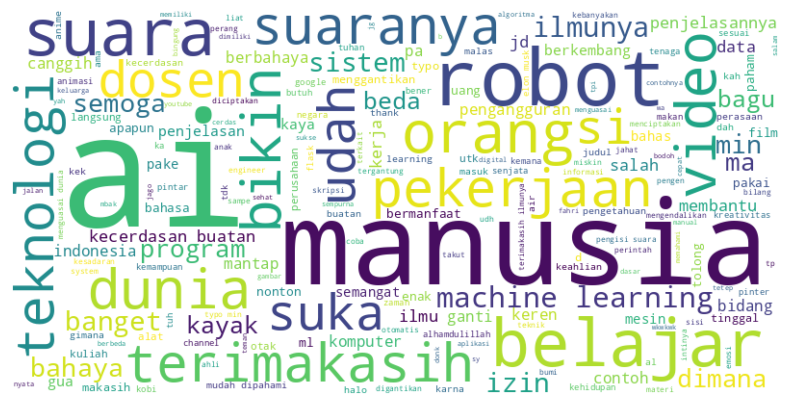

In [17]:
text_for_wordcloud = ' '.join(comments_df['Cleaned_Comment'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Based on the Word Cloud above, words mostly used are "AI", "manusia", "robot", "teknologi", "belajar", "pekerjaan". Kata-kata ini mempunyai berbagai kaitan dengan ML dan juga AI. Terdapat concern terhadap pekerjaan manusia yang akan digantikan dengan robot.

### Vectorizing the comments using two methods, Count Vectorizer and TF IDF Vectorizer

In [21]:
# CountVectorizer with Bigrams
count_vectorizer = CountVectorizer(ngram_range=(2, 2))  # Generate bigrams
count_vectorized = count_vectorizer.fit_transform(comments_df['Cleaned_Comment'])
count_vectorized_df = pd.DataFrame(count_vectorized.toarray(), columns=count_vectorizer.get_feature_names_out())
print("Count Vectorizer with Bigrams:\n", count_vectorized_df)

# TfidfVectorizer with Bigrams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(2, 2))  # Generate bigrams
tfidf_vectorized = tfidf_vectorizer.fit_transform(comments_df['Cleaned_Comment'])
tfidf_vectorized_df = pd.DataFrame(tfidf_vectorized.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Vectorizer with Bigrams:\n", tfidf_vectorized_df)

Count Vectorizer with Bigrams:
       01 50  02 36  05 bilek  05 pembagian  06 19  06 definisi  07 ending  \
0         0      0         0             0      0            0          0   
1         0      0         0             0      0            0          0   
2         0      0         0             0      0            0          0   
3         0      0         0             0      0            0          0   
4         0      0         0             0      0            0          0   
...     ...    ...       ...           ...    ...          ...        ...   
1022      0      0         0             0      0            0          0   
1023      0      0         0             0      0            0          0   
1024      0      0         0             0      0            0          0   
1025      0      0         0             0      0            0          0   
1026      0      0         0             0      0            0          0   

      07 momen  09 11  10 jam  ...  yutup k

#### Besides only viewing the common words of the dataset, it is also useful to see bigrams or two words that are common in the dataset as it may bring new insights.

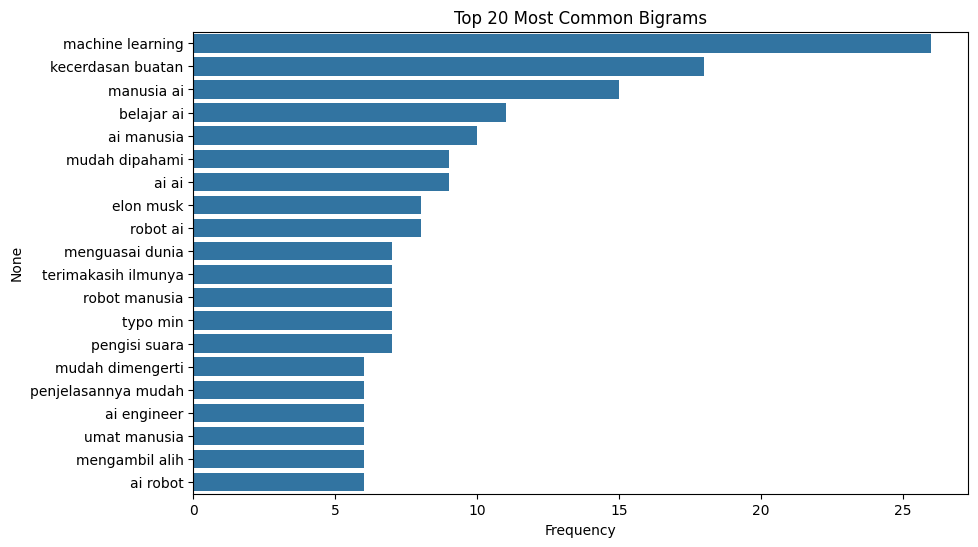

In [23]:
# Sum up the frequencies of each bigram
ngram_counts = count_vectorized_df.sum(axis=0).sort_values(ascending=False)

# Plot the top 20 bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=ngram_counts[:20].values, y=ngram_counts[:20].index)
plt.title("Top 20 Most Common Bigrams")
plt.xlabel("Frequency")
plt.show()


##### From the bigrams, it is more visible that the positive comments are gratification of the viewers for the tutorial videos. The more negative comments are more about how AI would take over the world, which seems to be a concern in Indonesia.